# To predict the given data using Supervised ML
# Author: Jagriti Priyadarshani

# Task 1:To predict the percentage of student score on no.of study hours

# Loading Dataset

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [10]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [40]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [44]:
df.shape

(25, 2)

#  Exploring Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting Data

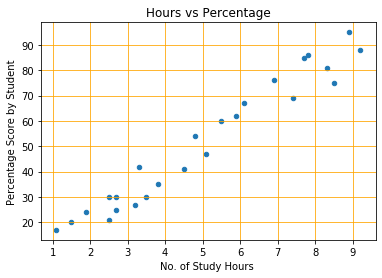

In [51]:
# Data Visualisation using ScatterPlot
df.plot(x='Hours', y='Scores', kind='Scatter')
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Study Hours ')  
plt.ylabel('Percentage Score by Student') 
plt.grid(color="orange")
plt.show()

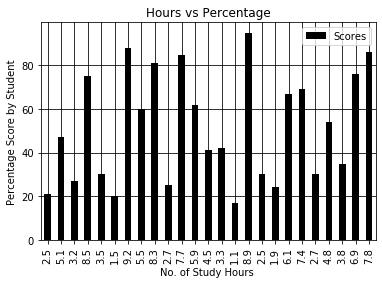

In [52]:
# Data Visualisation using Barplots
df.plot(x='Hours', y='Scores', kind='bar',color='black')
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Study Hours ')  
plt.ylabel('Percentage Score by Student') 
plt.grid(color="black")
plt.show()

from above bar graph we can clearly say that as no. of study hours increases the percentage score of student also increases
that is study hours is directly proportional to percentage score by student

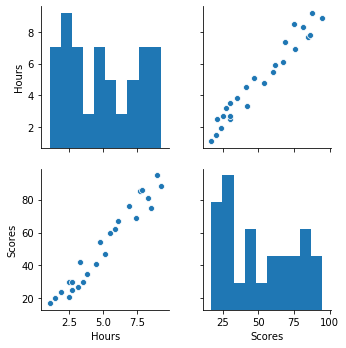

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show()

# Preparing Data and training the test model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.iloc[:, :-1].values  #dividing the data into inputs and outputs
Y = df.iloc[:, 1].values  

In [93]:
#we split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


In [94]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

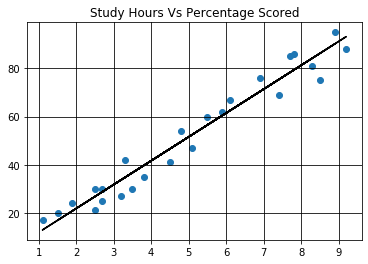

In [95]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color="black")
plt.title("Study Hours Vs Percentage Scored")
plt.grid(color="black")
plt.show()

# Predicting the data

In [109]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores
print(Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [97]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


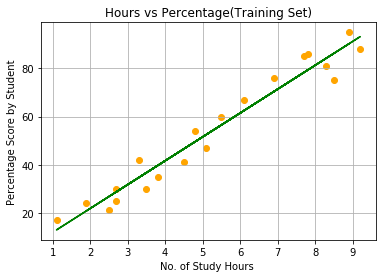

In [112]:
plt.scatter(X_train,Y_train,color='orange')
plt.plot(X_train,regressor.predict(X_train),color='green')
plt.title('Hours vs Percentage(Training Set)')  
plt.xlabel('No. of Study Hours ')  
plt.ylabel('Percentage Score by Student') 
plt.grid()
plt.show()

In [124]:
Study_Hours = 9.25
hours_pred = regressor.predict([[Study_Hours]])
print("No of Hours = {}".format(Study_Hours))
print("Predicted Score = {}".format(hours_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Conclusion:
If a student studies for 9.5 hrs/day then the predicted score will be 93.69173248737538

# Evaluating model

In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [120]:
mean_absolute_error(Y_test,Y_pred)

4.183859899002975

In [121]:
mean_squared_error(Y_test,Y_pred)

21.5987693072174

In [122]:
root_mean_squared_error=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("root_mean_squared_error:",root_mean_squared_error)

root_mean_squared_error: 4.6474476121003665
